In [11]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
churn_df = pd.read_csv('./data/telecom_churn_clean.csv', index_col=0)
churn_df.head(2)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [6]:
# Create scatter plot
fig = px.scatter(
    churn_df,
    x="account_length",
    y="customer_service_calls",
    color="churn",
    title="Customer Churn: Account Length vs Customer Service Calls",
    color_discrete_map={
        "0": "blue",   # Not churned
        "1": "red"     # Churned
    },
    labels={"churn": "Churn Status"}
    #color_discrete_map="Viridis"  # for numeric churn; use "Set1" for categorical
)
fig.show()

In [7]:
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))
# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

X shape: (3333, 2)
y shape: (3333,)


,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [5]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


Computing Accuracy

In [ ]:
# Import the module
from sklearn.model_selection import train_test_split

#Machine learning models (like KNeighborsClassifier) must learn patterns from only the input features, not from the target label itself — otherwise they would “cheat.” So we separate the features and the target label into two different arrays:
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8740629685157422


In [13]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.9036009002250562, np.int64(3): 0.9114778694673669, np.int64(4): 0.8945986496624156, np.int64(5): 0.8953488372093024, np.int64(6): 0.8893473368342085, np.int64(7): 0.8885971492873218, np.int64(8): 0.8863465866466617, np.int64(9): 0.8870967741935484, np.int64(10): 0.8840960240060015, np.int64(11): 0.8874718679669917, np.int64(12): 0.8837209302325582} 
 {np.int64(1): 0.7946026986506747, np.int64(2): 0.8605697151424287, np.int64(3): 0.8500749625187406, np.int64(4): 0.8695652173913043, np.int64(5): 0.8740629685157422, np.int64(6): 0.8650674662668666, np.int64(7): 0.8710644677661169, np.int64(8): 0.863568215892054, np.int64(9): 0.8725637181409296, np.int64(10): 0.8665667166416792, np.int64(11): 0.8710644677661169, np.int64(12): 0.8710644677661169}


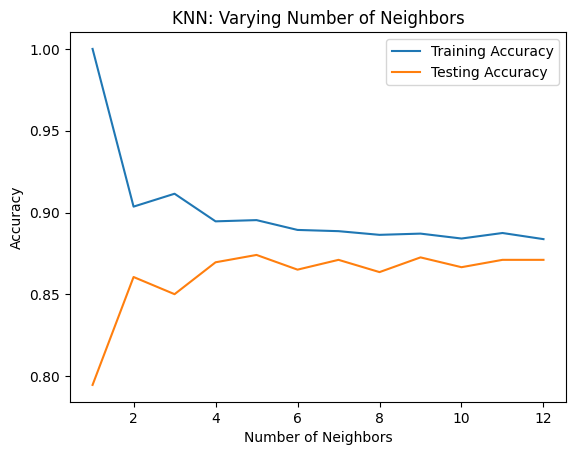

In [14]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [15]:
# See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model.